In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br/>

<hr style="border: 1px solid #fdb515;" />

# INSTRUCTOR VERSION

## Part 2: Exploratory Data Analysis (EDA) and Observations

A university's admission is related to the different aspects of the society, and often becomes a good reflection on societal's values and dynamic. For this part of the assignment, we will be working with a segment of **UC Berkeley's 1973 graduate admission data** to further explore how gender (recorded binary: Female and Male during 1973) plays a role in admission.

In *Part 1: Observation and Instrumentation*, we explored the data from a less objective lens by making obsersvations, claims, and credence levels to what we thought the dataset represented simply by taking glances at the raw data. In this part, we will get the chance to really dive into the data by performing Exploratory Data Analysis.

Exploratory Data Analysis, or EDA for short, is the process of analyzing/summarizing data to extract valuable insights and patterns that can help guide further analysis. EDA is usually performed at the beginning of a data science project and helps to guide the direction of the analysis. EDA allows us to gain an understanding of the data, identify any patterns or anomalies, and detect any potential issues that may affect the analysis. In the following problems, we will perform EDA on our admission rates dataset.

In *Part 1*, we explored the data with respect to gender and admission rates. Now, let's take a look at how gender plays a role in admission rates. 


## **Question 1: Comprehensive Analysis**

**Question 1.1)** Like last lab, load the *```berkeley.csv```* dataset below.

In [3]:
# Instructor Solution

berkeley = pd.read_csv('berkeley.csv')
berkeley.head(15)

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
5,1973,Other,M,Rejected
6,1973,F,F,Accepted
7,1973,Other,M,Accepted
8,1973,Other,M,Rejected
9,1973,A,M,Accepted


**Question 1.2)** Using the `berkeley` dataset, calculate the number of acceptances, rejections, total applicants, and acceptance rate for each combination of major and gender. For clarity, your DataFrame should have the following columns: Major, Gender, Accepted, Rejected, Counts, and Acceptance Rate.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>Start this problem by using `groupby` on the `"Major"` and `"Gender"` columns. Set this to `grouped_data`.</i>
- <i>Using `grouped_data`, calculate the counts for accepted, rejected, and total counts. 
- <i>`Pandas`' `apply` method and the helper functions provided may be useful here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html</i>
- <i>Your resulting DataFrame should resemble the table below:</i> <br> <br>
![admissions_by_all_output](admissions_by_all_output.png)

</details>

In [4]:
# Useful Helper Functions

def accepted_count(x):
    return (x == "Accepted").sum()

def rejected_count(x):
    return (x == "Rejected").sum()

In [5]:
# Instructor Solution

grouped_data = berkeley.groupby(['Major', 'Gender'])

acceptance_counts = grouped_data['Admission'].apply(accepted_count).rename('Accepted')
rejection_counts = grouped_data['Admission'].apply(rejected_count).rename('Rejected')
applicant_counts = grouped_data.size().rename('Counts')

acceptance_rate = (acceptance_counts / applicant_counts).rename('Acceptance Rate')

admissions_by_all = pd.concat([acceptance_counts, rejection_counts, applicant_counts, acceptance_rate], axis=1)
admissions_by_all.reset_index(inplace=True)
admissions_by_all

,Major,Gender,Accepted,Rejected,Counts,Acceptance Rate
0,A,F,89,19,108,0.824074
1,A,M,825,313,1138,0.724956
2,B,F,17,8,25,0.680000
3,B,M,353,207,560,0.630357
4,C,F,201,392,593,0.338954
5,C,M,120,205,325,0.369231
6,D,F,131,244,375,0.349333
7,D,M,138,279,417,0.330935
8,E,F,94,299,393,0.239186
9,E,M,53,138,191,0.277487


**Question 1.3)** Before we can build a `bar` plot that visualizes the acceptance rates by major and gender, we must first calculate the admission errors for each major-gender pair. 

In [6]:
# Instructor Solution

majors = admissions_by_all['Major'].unique()
admission_error = []

for major in majors:
    temp_df = admissions_by_all[admissions_by_all['Major'] == major]
    app = temp_df['Counts'].sum()
    adm = temp_df['Accepted'].sum()
    p_male_app = temp_df[temp_df['Gender'] == 'M'].reset_index()['Counts'][0] / app
    p_female_app = temp_df[temp_df['Gender'] == 'F'].reset_index()['Counts'][0] / app
    var_m = (1 - p_male_app) / p_male_app * (adm / app**2)
    var_f = (1 - p_female_app) / p_female_app * (adm / app**2)
    admission_error.extend([np.sqrt(var_m), np.sqrt(var_f)])

admissions_by_all["Admission Error"] = admission_error
admissions_by_all

,Major,Gender,Accepted,Rejected,Counts,Acceptance Rate,Admission Error
0,A,F,89,19,108,0.824074,0.007475
1,A,M,825,313,1138,0.724956,0.078762
2,B,F,17,8,25,0.680000,0.006947
3,B,M,353,207,560,0.630357,0.155621
4,C,F,201,392,593,0.338954,0.026363
5,C,M,120,205,325,0.369231,0.014449
6,D,F,131,244,375,0.349333,0.019638
7,D,M,138,279,417,0.330935,0.021838
8,E,F,94,299,393,0.239186,0.029780
9,E,M,53,138,191,0.277487,0.014473


**Question 1.4)** Construct a `bar` plot that visualizes the admission rates by gender within each major. We recommend using helper function provided below `hued_barplot_with_error`.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>Each x variable should be a different major plotting the acceptance rates for the two genders.</i>
- <i>Use the `hue` parameter as a way to differentiate between the two genders</i>
- <i>`df` should be type `pd.Dataframe`. `x`, `y`, `hue`, and `error` should be type `str`

</details>

In [7]:
# Useful Helper Function

def hued_barplot_with_error(df, x, y, hue, error):
    fig, ax = plt.subplots(figsize=(12, 6))

    bar_width = 0.35

    majors = df[x].unique()
    bar_positions = np.arange(len(majors))

    for i, gender in enumerate(df[hue].unique()):
        gender_data = df[df[hue] == gender]
        positions = bar_positions + i * bar_width
        ax.bar(positions, gender_data[y], bar_width, 
            label=gender, yerr=gender_data[error], capsize=5)
        
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title('Acceptance Rates by Major and Gender with Error Bars')
    ax.set_xticks(bar_positions + bar_width / 2)
    ax.set_xticklabels(majors)
    ax.legend(title=hue)
    plt.show()

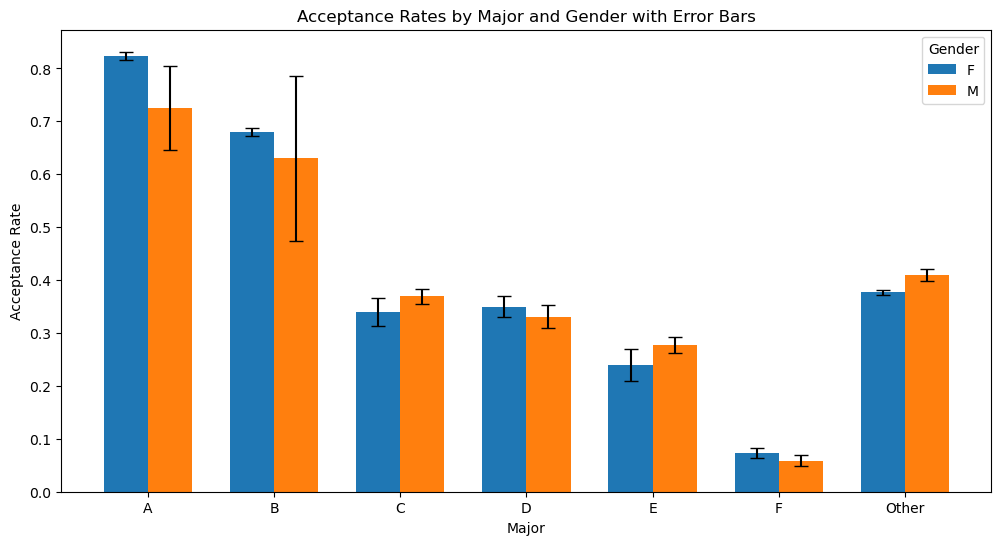

In [8]:
# Instructor Solution

hued_barplot_with_error(admissions_by_all, 'Major', 'Acceptance Rate', 'Gender', 'Admission Error')

**TODO:** *Make point more clear ; for every individual majors, is there any statistically signficant difference in the admissions rates between male and female applicants; look at width of error bars (maybe no hints); expect 2/3 bars will include correct expected values*;;; might be easier if you ask afterwards (HINT: Do the bars differ from an amount more than the height of each error bar? If each error bar represents 68% CI, how many of these categories to do you "expect to be statistically signficant" due to random chance)

**Question 1.5)** Looking at the bar plot you made above, what do you conclude about the admission rates between male and female applicants? Is there any noticeable discrepency in the admission rates between male and female applicants, given the rates per major? How is it different from the observations you made in questions 1 and 2? *Bonus: How have your credence levels changed from Part 1?*

*Your Answer Here*

**Question 1.6)** https://rpubs.com/masiyab/937036

In [9]:
# Useful Helper Function

def plot_admissions(df, x, hue, y1, y2):
    fig, ax = plt.subplots(figsize=(14, 8))

    bar_width = 0.35
    space = 0.05

    majors = df[x].unique()
    bar_positions = np.arange(len(majors))

    female_data = df[df[hue] == 'F']
    ax.bar(bar_positions - (bar_width + space)/2, female_data[y1], bar_width, label='{y1} (F)', color='grey')
    ax.bar(bar_positions - (bar_width + space)/2, female_data[y2], bar_width, label='{y2} (F)', color='red', bottom=female_data[y1])

    male_data = df[df[hue] == 'M']
    ax.bar(bar_positions + (bar_width + space)/2, male_data[y1], bar_width, label='{y1} (M)', color='grey', hatch='//')
    ax.bar(bar_positions + (bar_width + space)/2, male_data[y2], bar_width, label='{y2} (M)', color='red', hatch='//', bottom=male_data[y1])

    ax.set_xlabel('Major')
    ax.set_ylabel('Count')
    ax.set_title("Admissions for each Department at UC Berkeley")
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(majors)
    ax.legend()
    plt.show()

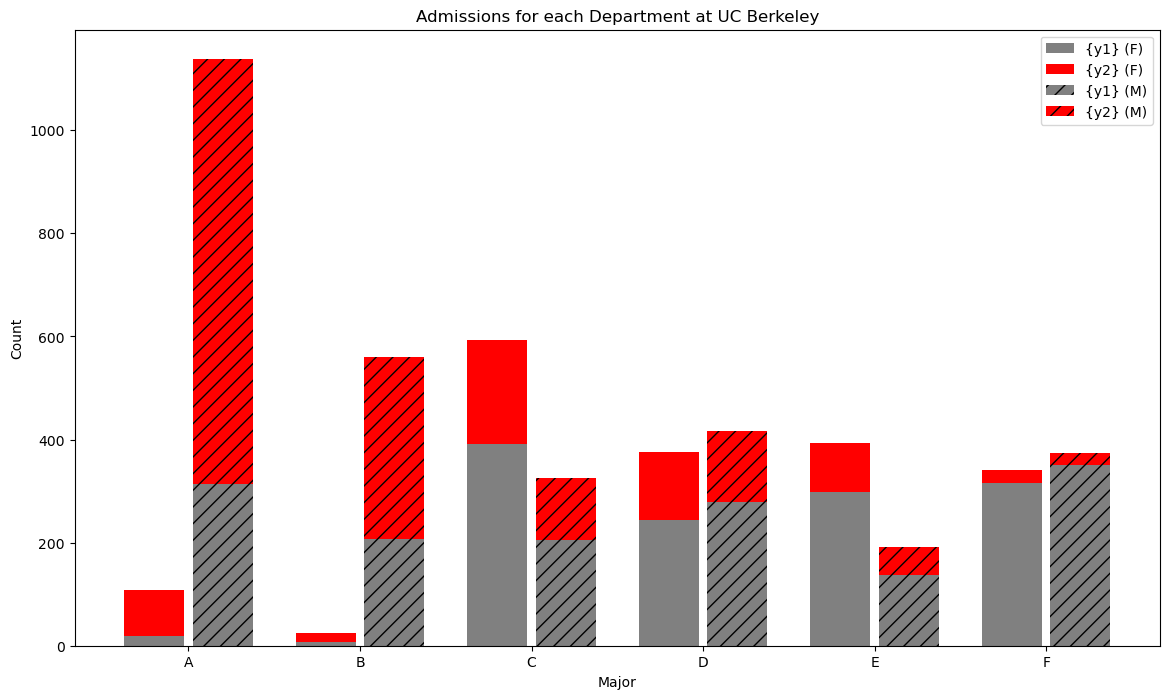

In [10]:
# Instructor Solultion
df_without_other = admissions_by_all[admissions_by_all["Major"] != "Other"]
plot_admissions(df_without_other, "Major", "Gender", "Rejected", "Accepted")

**Question 1.7)** Short-response question

*Your Answer Here*

## **Question 2: Sandbox**

Now that we have fully explored UC Berkeley's 1973 graduate admission, let us now use what we have learned and apply it to a new dataset.

We will now take a look at Berkeley's incoming freshman demographics from 1981 to 1988. The original data can be found [here](https://academic-senate.berkeley.edu/sites/default/files/karabel_report.pdf) on Table 3.

For your convenience, we have loaded two datasets. 
<br>
`all_ethnic_groups`: A fully expanded dataframe showing the ethnic distributions of all recorded ethnic groups. Each value represents the percent that ethnic group makes up of Berkeley's incoming freshman. Note that the columns do not add to 100 since some ethnic groups are simply the sum of all of its appropriate subgroups.
<br>
`major_ethnic_groups`: A more concise dataframe showing the ethnic distributions of the major ethnic groups. These columns do add to 100.

In [24]:
all_ethnic_groups = pd.read_csv("all_ethnic_groups.csv")
major_ethnic_groups = all_ethnic_groups[['Year', 'American Indian', 'Asian', 'Black', 'Hispanics', 'White', 'Other', 'No Ethnic Data', 'Total']]
display(major_ethnic_groups)
display(all_ethnic_groups)

,Year,American Indian,Asian,Black,Hispanics,White,Other,No Ethnic Data,Total
0,1981,0.3,26.2,5.2,6.4,57.9,2.9,1.1,100.0
1,1982,0.3,27.6,5.6,5.7,57.7,2.2,0.9,100.0
2,1983,0.4,28.0,5.6,6.1,56.7,2.3,0.9,100.0
3,1984,0.6,24.3,7.3,8.8,55.7,1.5,1.7,100.0
4,1985,0.7,26.9,7.8,10.5,48.0,2.0,4.1,100.0
5,1986,0.9,26.7,8.2,12.4,45.6,1.7,4.5,100.0
6,1987,2.1,25.4,12.5,17.0,39.8,0.2,3.0,100.0
7,1988,1.8,26.2,10.8,18.6,37.0,0.8,4.9,100.0


,Year,American Indian,Chinese,East Ind./Pak.,Japanese,Korean,Pacific Islander,Filipinos,Other Asian,Asian,Black,Chicano,Latino,Hispanics,White,Other,No Ethnic Data,Total
0,1981,0.3,14.7,0.6,3.3,3.0,0.1,3.4,1.0,26.2,5.2,4.2,2.1,6.4,57.9,2.9,1.1,100.0
1,1982,0.3,14.0,1.0,4.4,3.3,0.1,3.4,1.3,27.6,5.6,3.5,2.2,5.7,57.7,2.2,0.9,100.0
2,1983,0.4,13.8,0.9,3.9,3.6,0.2,3.9,1.8,28.0,5.6,4.1,2.0,6.1,56.7,2.3,0.9,100.0
3,1984,0.6,10.1,1.5,3.1,3.4,0.0,4.7,1.4,24.3,7.3,5.5,3.3,8.8,55.7,1.5,1.7,100.0
4,1985,0.7,10.8,1.5,3.4,4.2,0.1,5.4,1.6,26.9,7.8,6.9,3.7,10.5,48.0,2.0,4.1,100.0
5,1986,0.9,11.6,1.4,2.4,4.1,0.1,5.8,1.2,26.7,8.2,8.4,4.0,12.4,45.6,1.7,4.5,100.0
6,1987,2.1,10.4,1.6,2.3,3.8,0.1,5.7,1.5,25.4,12.5,10.5,6.5,17.0,39.8,0.2,3.0,100.0
7,1988,1.8,11.4,1.8,1.6,4.1,0.1,5.4,1.8,26.2,10.8,10.8,7.8,18.6,37.0,0.8,4.9,100.0


**Question 2.1)** Explore the data! This question is open-ended and can be approached from a variety of perspectives. To receive full credit for this section, produce a dataframe and/or plot that could display any disparity in admissions rates. The work you do here should set you up well enough to confidently answer the questions that follow below.

In [25]:
# Instructor Solution

# Valid solutions may vary, below are examples of what may pass as valid EDA

In [26]:
# Instructor Solution 1

major_ethnic_groups.describe()

,Year,American Indian,Asian,Black,Hispanics,White,Other,No Ethnic Data,Total
count,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000,8.0000,8.000000,8.0
mean,1984.50000,0.887500,26.41250,7.875000,10.687500,49.800000,1.7000,2.637500,100.0
std,2.44949,0.691659,1.18495,2.615749,4.975494,8.410538,0.8652,1.696162,0.0
min,1981.00000,0.300000,24.30000,5.200000,5.700000,37.000000,0.2000,0.900000,100.0
25%,1982.75000,0.375000,26.00000,5.600000,6.325000,44.150000,1.3250,1.050000,100.0
50%,1984.50000,0.650000,26.45000,7.550000,9.650000,51.850000,1.8500,2.350000,100.0
75%,1986.25000,1.125000,27.07500,8.850000,13.550000,56.950000,2.2250,4.200000,100.0
max,1988.00000,2.100000,28.00000,12.500000,18.600000,57.900000,2.9000,4.900000,100.0


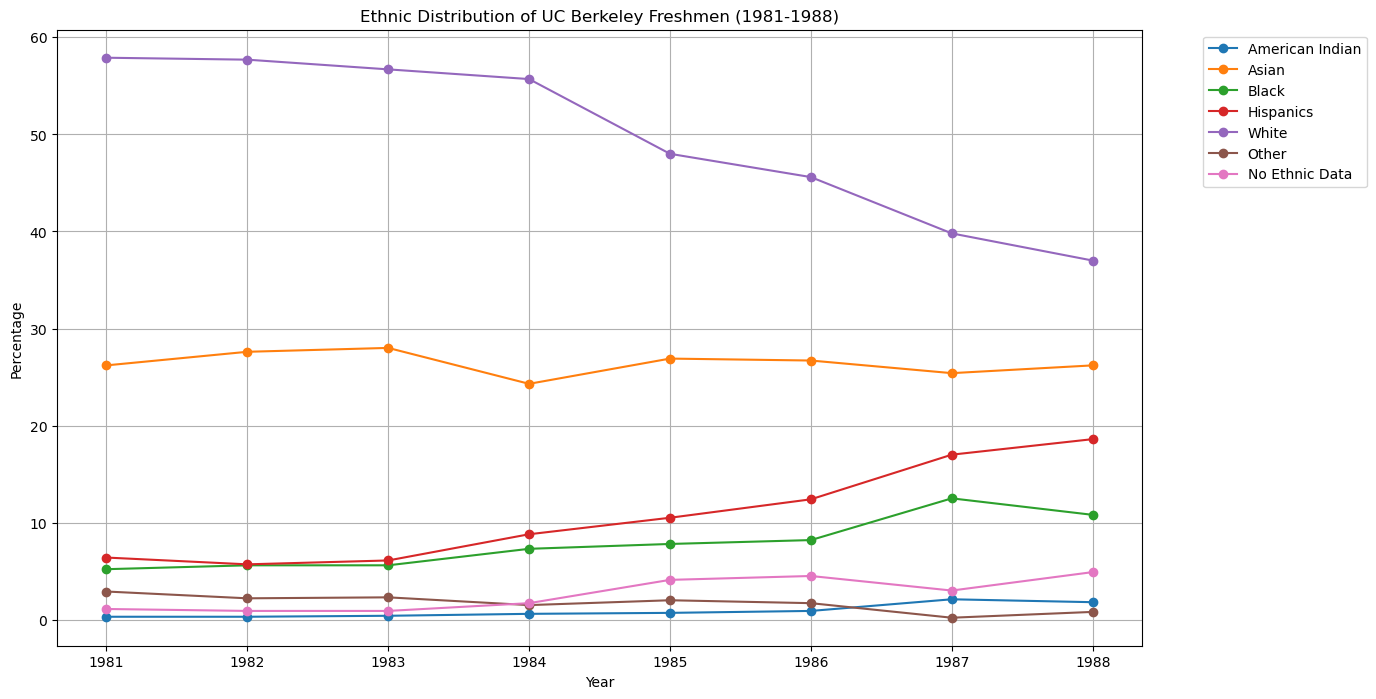

In [30]:
# Instructor Solution 2

plt.figure(figsize=(14, 8))
for column in major_ethnic_groups.columns[1:-1]:  # Exclude 'Year' and 'Total'
    plt.plot(major_ethnic_groups['Year'], major_ethnic_groups[column], marker='o', label=column)

plt.title('Ethnic Distribution of UC Berkeley Freshmen (1981-1988)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

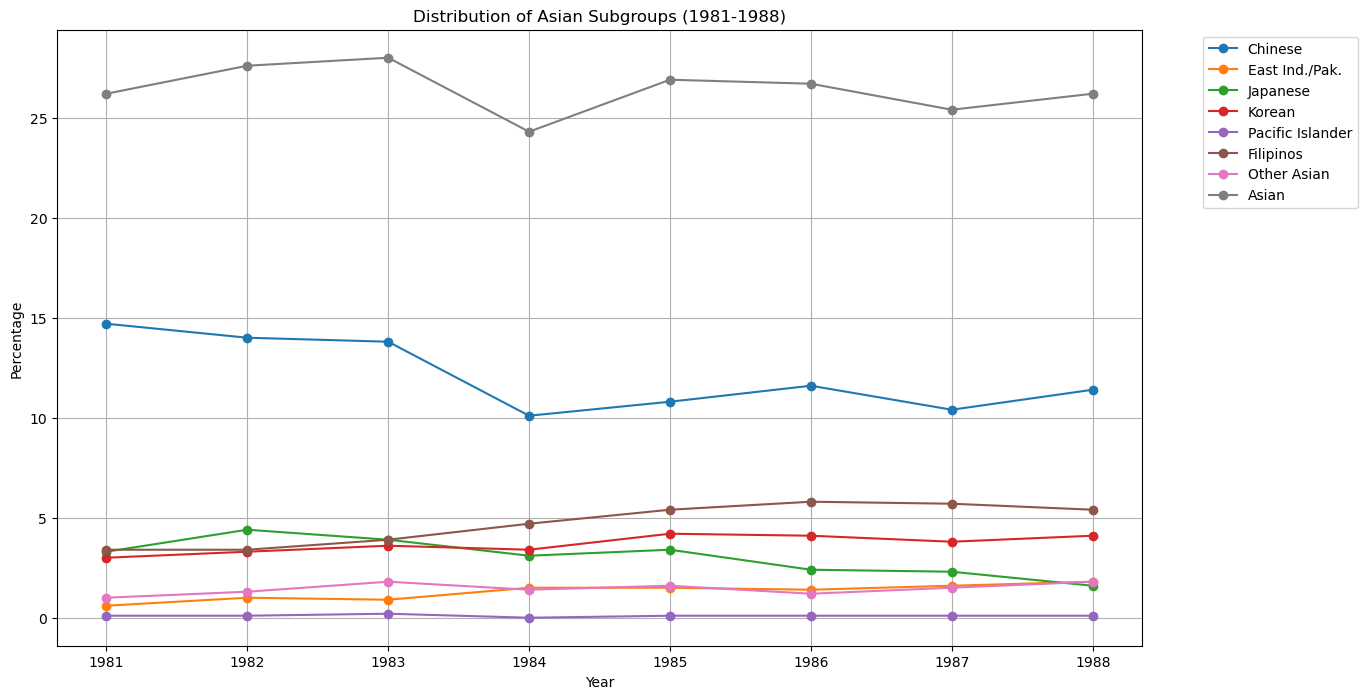

In [36]:
# Instructor Solution 3

asian_distribution = all_ethnic_groups[['Year', 'Chinese', 'East Ind./Pak.', 'Japanese', 'Korean', 'Pacific Islander', 'Filipinos', 'Other Asian', 'Asian']]

plt.figure(figsize=(14, 8))
for column in asian_distribution.columns[1:]:
    plt.plot(asian_distribution['Year'], asian_distribution[column], marker='o', label=column)

plt.title('Distribution of Asian Subgroups (1981-1988)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Question 2.2)** Describe what dataframe/plot(s) you have produced. What inclined you to produce it? What has it allowed you to visualize or notice?

*Your Answer Here*

**Question 2.3)** Having explored the data yourself, are there any valid conclusions that can be drawn about the ethnic distribution of UC Berkeley's freshmen in the 1980s? If there are no valid conclusions to be made, what are the reasons for this limitation?

*Your Answer Here*

Instructor Solution:

No conclusions can be drawn as we do not have sufficient data to compare against. If we were to receive additional data, we could compare Berkeley's freshman demographics to California's demographics. If we find a discrepancy, there are many things that can attribute to such a finding. One, the applicant pool could be representative of the state demographics, but our admissions process is biased. Two, the admissions process could be biased in a non-intentional way because applicants that are representative may not apply to majors in a representatitive way. Three, the admissions process has intentional racism. Four, the applicant pool is not representatitve of the state's pool. Perhaps some demographics do not want to go to college, but there still may or may not be racial bias in the admissions process.

**Question 2.4)** Say you are a statistician for UC Berkeley, and your job is to validate the ethnic distributions of each incoming class so you can report back to the admissions office. What additional data is necessary for check if UC Berkeley's admission rates have any signficant discrepancies?

*Your Answer Here*

Instructor Solution:

We will need the state's demographics, the applicant pool demographics, and applicant pool dmeographics per major.

**Question 2.5)** Say you were a government official specializing in education intervention. Where do you believe intervention should take place to ensure that college admission numbers are more equally distributed? Intervention at college admissions? Or at an earlier stage?

*Your Answer Here*

## **Question 3: Closing Thoughts**

What we just observed is a classic example of [Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox), a statistical phenomenon where a trend that appears in different groups of data disappears or reverses when these groups are combined. In our case, the groups are the different majors. This paradox is part of a broader set of considerations that need to be made when performing EDA, as it can drastically change the interpretation of the data and subsequent policy recommendation.

In the following questions, we'll delve further into how incomplete EDA and phenomena like Simpson's Paradox may pose as an invisible obstacle to comprehensive analysis.

**Question 3.1:** In part 1, when we looked at all UC Berkeley applicants, we found gender bias in the admission process. Suppose a policy was recommended and implemented to equalise the university-wide acceptance rates between male and female. What positive consequences would you anticipate from this policy? What negative consequences would you anticipate from this policy?

*Your Answer Here*

**Question 3.2:** In part 2, when we looked at applicants to individual majors, we did not find gender bias in the admission process. Suppose nothing was changed about UC Berkeley's admission process as a result. What positive and negative consequences would you anticipate from this inaction?

*Your Answer Here*

**Question 3.3:** Of the two methods of analysis (i.e. looking at individual majors or not), which one do you think is "more correct"?

*Your Answer Here*

There is actually no correct answer to the question above. There are countless ways in which we could've "chopped up" the data into groups. For example, we could've grouped the applicants, not by major, but by the first letter of their surname. Should we make policy recommendations if we found a bias against male applicants with D names?

At the end, Simpson's Paradox tells us that the choice of data grouping involves a values judgment—we may deem separation by majors as more important than separation by first letter of their surname. To make a decision, we must consider the impact of this choice, as in questions 3.1 and 3.2. As diligent data analysts, we must be aware of this often implicit values decision when we dive into a dataset.

**Question 3.4:** (Self-reflection) When you reached the end of part 1, was the conclusion of gender bias what you expected of UC Berkeley in 1973? How did that make you feel? Did this feeling motivate you to dive deeper into the dataset, or to quickly announce it to the world?

*Your Answer Here*

<br/>

<hr style="border: 1px solid #fdb515;" />

This is the end of the notebook! Great work!

          /\\_/\\      
         / o o  \\     
        (   "    ))    
         \\~(*)~//     
          \\~~~//      